**Decision Tree Classifier Building in Scikit-learn**

In [13]:
import requests

# URL of the CSV file from Google Drive
file_id = '1-Fc_DDX_Owj_zoQ1eNzQHYrVEunHEkeY'
url = f'https://drive.google.com/uc?export=download&id={file_id}'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the response to a file
    with open('heart.csv', 'wb') as f:
        f.write(response.content)
    print('File downloaded successfully.')
else:
    print(f'Failed to download the file. Status code: {response.status_code}')

File downloaded successfully.




---



Importing Required Libraries

In [14]:
import numpy as np
import pandas as pd

In [15]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation



---



Loading Data

In [16]:
# col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
col_names = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST", "ST_Slope_Flat", "ST_Slope_Up", "FastingBS", "age_group", "Cholestoral_group", "HR_Groups", "blood_pressure_group", "Sex", "ExerciseAngina", "target"]

# Old data set
# data = pd.read_csv('heart.csv', skiprows=1, header=None, names=col_names)
# data.head(10)

# New data set
data = pd.read_csv(r'..\..\Heart Disease Dataset\final_heart_last.csv', skiprows=1, header=None, names=col_names)
data.head(10)

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,FastingBS,age_group,Cholestoral_group,HR_Groups,blood_pressure_group,Sex,ExerciseAngina,target
0,0.244898,0.605263,0.703827,0.777778,0.288462,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,2,1,2,1,0,0,0
1,0.428571,0.868421,0.396371,0.659259,0.480769,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0,0,1,2,0,0,1,1
2,0.183673,0.473684,0.686903,0.229630,0.288462,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0,2,0,2,1,0,0,0
3,0.408163,0.578947,0.492275,0.303704,0.576923,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,1,2,0,1,1,1
4,0.530612,0.736842,0.438681,0.407407,0.288462,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,1,1,2,1,0,1,0
5,0.224490,0.342105,0.844862,0.762963,0.288462,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0,2,1,1,1,0,0,0
6,0.346939,0.473684,0.557151,0.762963,0.288462,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1,2,0,0,1,0
7,0.530612,0.210526,0.475350,0.555556,0.288462,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,1,1,1,1,0,1,0
8,0.183673,0.605263,0.472530,0.466667,0.576923,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0,1,1,2,1,1,0,1
9,0.408163,0.342105,0.689723,0.392593,0.288462,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0,2,1,1,0,0,1,0




---



**Feature Selection**
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [17]:
#split dataset in features and target variable
feature_cols = col_names = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak", "ChestPainType_ATA", "ChestPainType_NAP", "ChestPainType_TA", "RestingECG_Normal", "RestingECG_ST", "ST_Slope_Flat", "ST_Slope_Up", "FastingBS", "age_group", "Cholestoral_group", "HR_Groups", "blood_pressure_group", "Sex", "ExerciseAngina"]
X = data[feature_cols] # Features
y = data.target # Target variable



---



**Splitting Data**
To understand model performance, dividing the dataset into a training set and a test set is a good strategy.

Let's split the dataset by using the function train_test_split(). You need to pass three parameters features; target, and test_set size.

In [18]:
# Split dataset into training set and test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Using common training set and test set
X_train = pd.read_csv('..\..\DataSet for Training and Testing\Training_Set.csv')
X_test = pd.read_csv('..\..\DataSet for Training and Testing\Testing_Set .csv')
y_test = pd.read_csv('..\..\DataSet for Training and Testing\y_test.csv')
y_train = pd.read_csv('..\..\DataSet for Training and Testing\y_train.csv')



---



**Building Decision Tree Model**
Let's create a decision tree model using Scikit-learn.

In [19]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



---



**Evaluating the Model**
Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [20]:
# Model Accuracy, how often is the classifier correct using test set?
print("Accuracy of test dataset:",metrics.accuracy_score(y_test, y_pred))

Accuracy of test dataset: 0.7777777777777778


In [21]:
#Predict the response for train dataset
x_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct using train set?
print("Accuracy of train dataset:",metrics.accuracy_score(y_train, x_pred))

Accuracy of train dataset: 1.0


**Receiver operating characteristic (ROC)** A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

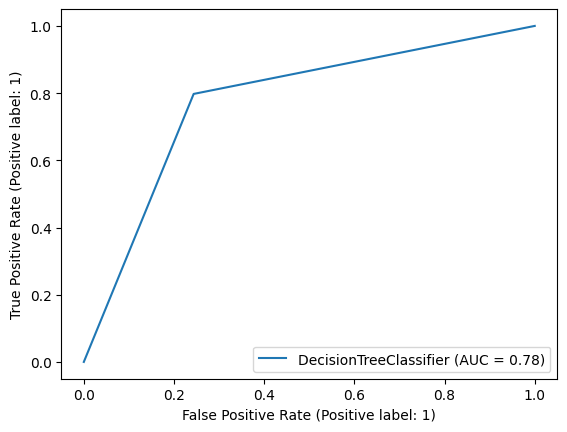

In [22]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()



---



Using the model to predict target of a single test data

In [23]:
# Building a Predictive System
input_data = (0.244898, 0.605263, 0.703827, 0.777778, 0.288462, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 2, 1, 2, 1, 0, 0)

# change the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = clf.predict(input_data_reshaped)

if (prediction[0]==0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

The person does not have a heart disease


C:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(




---



**Plot the decision surface of decision trees trained**

C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=5)
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=5)
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad

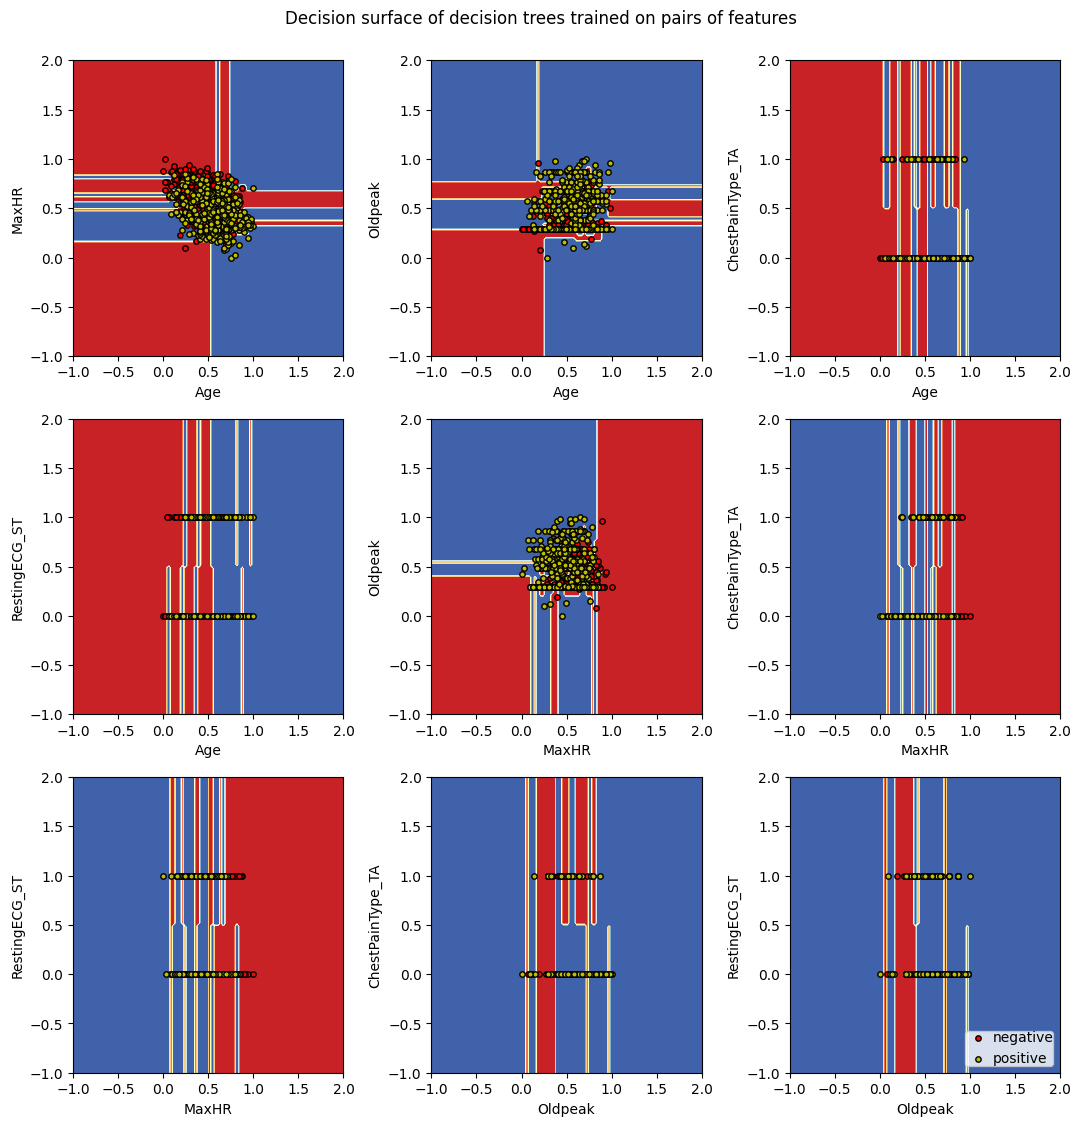

In [24]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

heart = {'data':data[feature_cols].to_numpy(), 'target':data.target.to_numpy(), 'feature_names':feature_cols, 'target_names':['negative', 'positive']}

# Increase the plot size
plt.figure(figsize=(12, 12))

for pairidx, pair in enumerate([[0, 3], [0, 4], [0, 7], [0, 9], [3, 4], [3, 7], [3, 9], [4, 7], [4, 9]]):
    # We only take the two corresponding features
    X = heart['data'][:, pair]
    y = heart['target']

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(3, 3, pairidx + 1)
    plt.tight_layout(h_pad=1, w_pad=1, pad=5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=heart['feature_names'][pair[0]],
        ylabel=heart['feature_names'][pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=heart['target_names'][i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")



---



**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [25]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

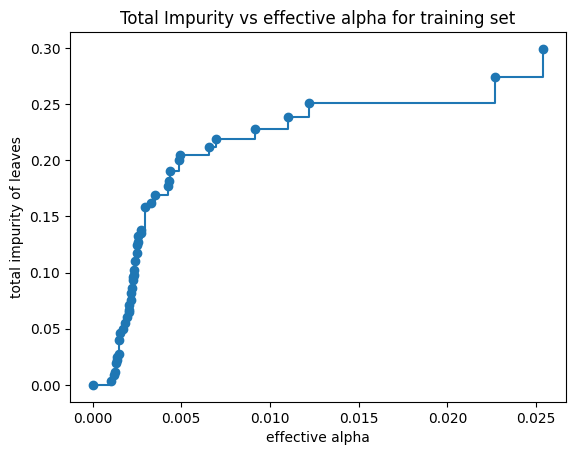

In [26]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [27]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.20001206377244546


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

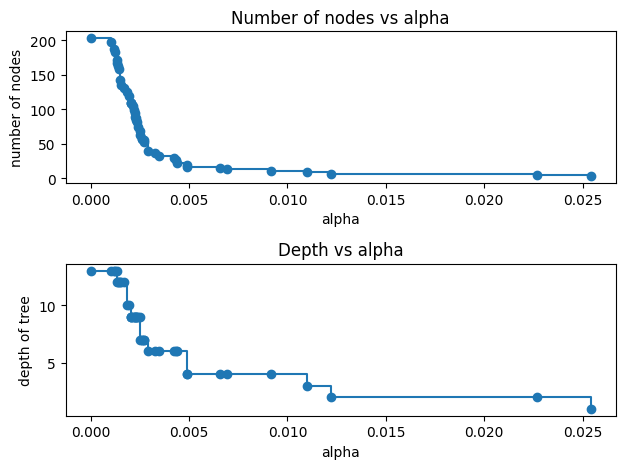

In [28]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()



---



**Accuracy vs alpha for training and testing sets**

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

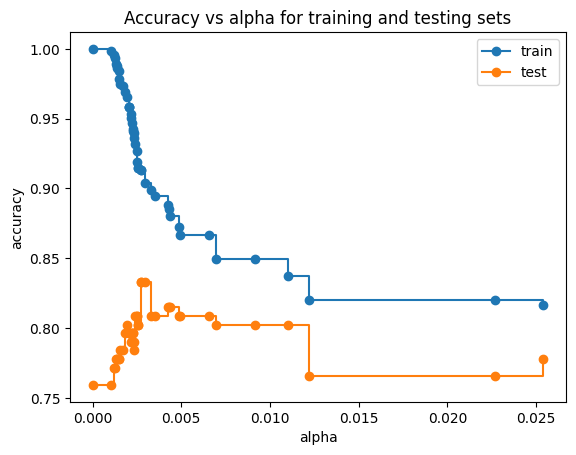

In [29]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()



---



In [58]:
!pip install graphviz

!pip install pydotplus

**Visualizing Decision Trees**
You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

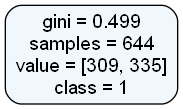

In [30]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('heart.png')
Image(graph.create_png())



---



**Optimizing Decision Tree Performance**
criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

splitter : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2'],
    'random_state': [42],
    'max_leaf_nodes': [None, 10, 20, 50],
    'min_impurity_decrease': [0.0, 0.01, 0.1],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

# Initialize the classifier
clf = DecisionTreeClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 15552 candidates, totalling 77760 fits
Best Parameters: {'ccp_alpha': 0.01, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 10, 'random_state': 42, 'splitter': 'random'}
Best Model: DecisionTreeClassifier(ccp_alpha=0.01, criterion='entropy', max_depth=7,
                       max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=10, random_state=42,
                       splitter='random')


In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", 
    splitter="best", 
    max_depth=3, 
    min_samples_split=4, 
    min_samples_leaf=2, 
    max_features="sqrt", 
    random_state=42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8209876543209876




---



**Visualizing Pruned Decision Trees** You can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. For plotting the tree, you also need to install graphviz and pydotplus.

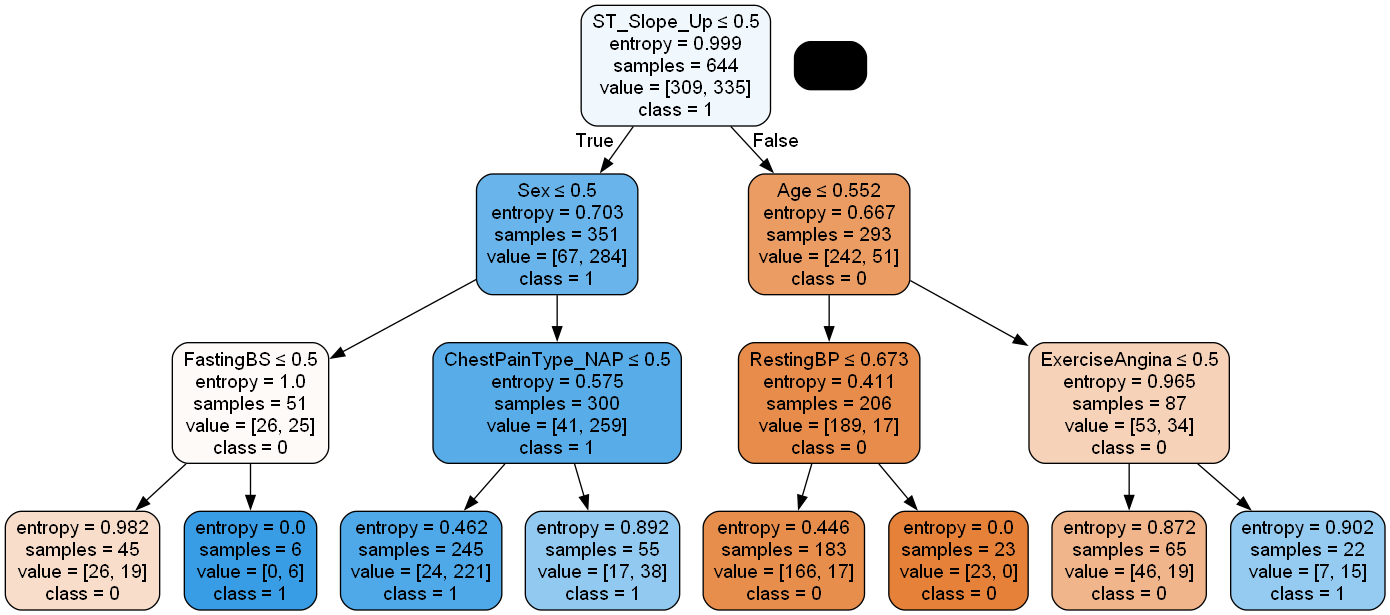

In [51]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

**Evaluating the Model**
Let's estimate how accurately the classifier or model can predict the type of cultivars.

Accuracy can be computed by comparing actual test set values and predicted values.

In [52]:
# Model Accuracy, how often is the classifier correct using test set?
print("Accuracy of test dataset:",metrics.accuracy_score(y_test, y_pred))

Accuracy of test dataset: 0.8209876543209876


In [53]:
#Predict the response for train dataset
x_pred = clf.predict(X_train)

# Model Accuracy, how often is the classifier correct using train set?
print("Accuracy of train dataset:",metrics.accuracy_score(y_train, x_pred))

Accuracy of train dataset: 0.8400621118012422


**Receiver operating characteristic (ROC)** A receiver operating characteristic (ROC), or simply ROC curve, is a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate.

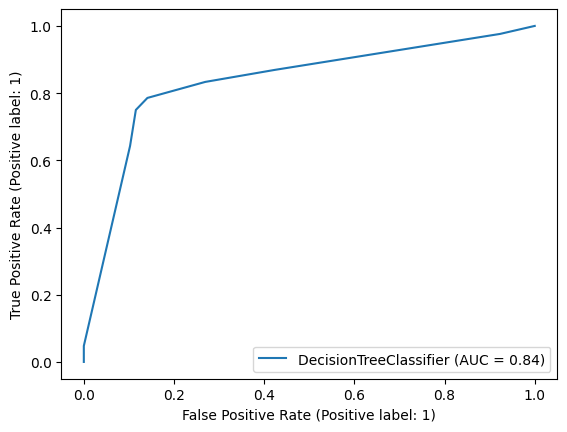

In [54]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt

svc_disp = RocCurveDisplay.from_estimator(clf, X_test, y_test)
plt.show()

Using the model to predict target of a single test data

In [55]:
# Building a Predictive System
input_data = (0.244898, 0.605263, 0.703827, 0.777778, 0.288462, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0, 2, 1, 2, 1, 0, 0)

# change the input data into a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = clf.predict(input_data_reshaped)

if (prediction[0]==0):
    print("The person does not have a heart disease")
else:
    print("The person has a heart disease")

The person does not have a heart disease


C:\Users\akash\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


**Plot the decision surface of decision trees trained**

C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=5)
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad=1, pad=5)
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:42: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\akash\AppData\Local\Temp\ipykernel_14080\1845940941.py:28: UserWarning: The figure layout has changed to tight
  plt.tight_layout(h_pad=1, w_pad

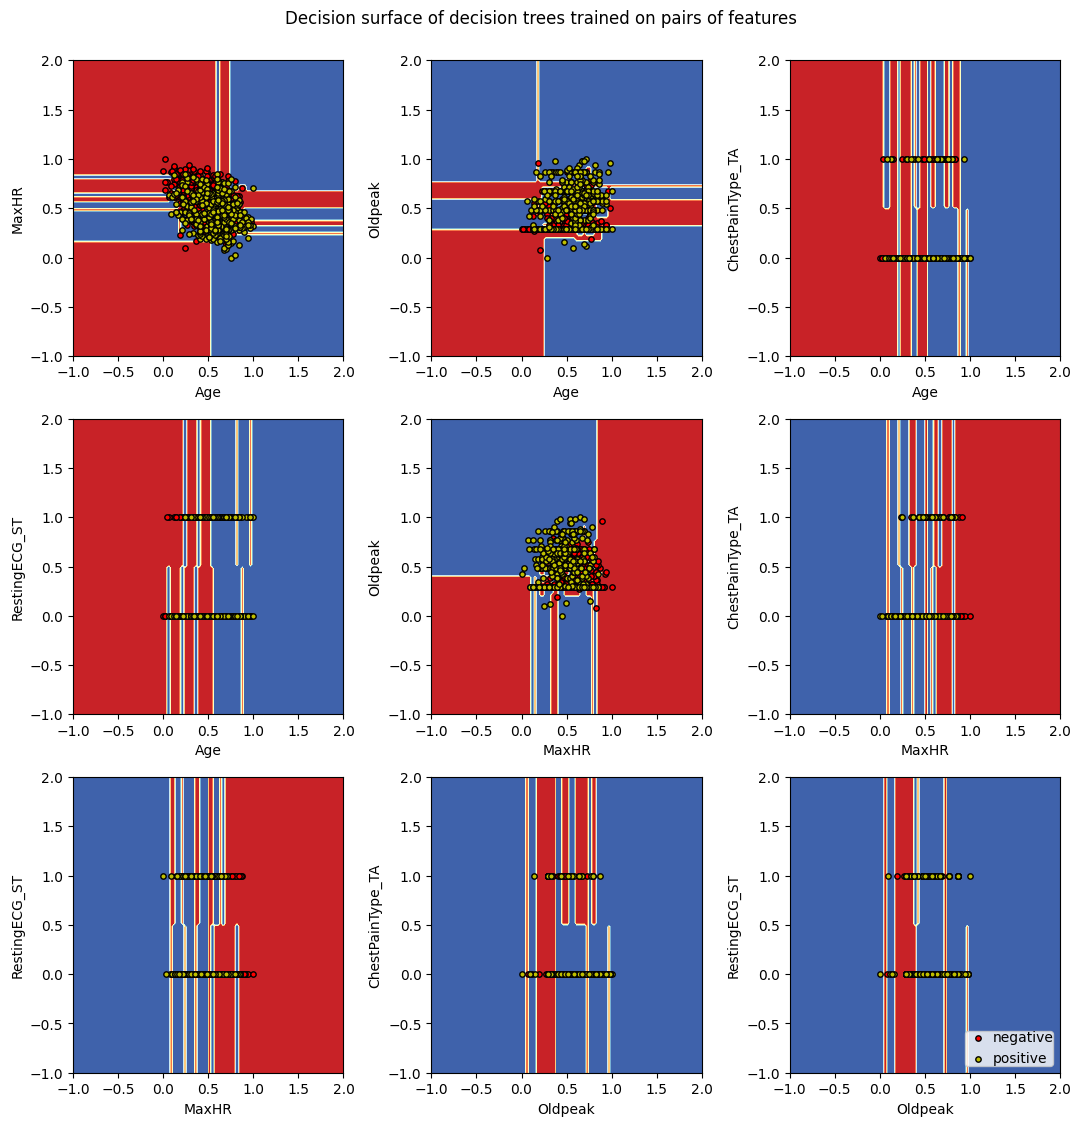

In [56]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_colors = "ryb"
plot_step = 0.02

heart = {'data':data[feature_cols].to_numpy(), 'target':data.target.to_numpy(), 'feature_names':feature_cols, 'target_names':['negative', 'positive']}

# Increase the plot size
plt.figure(figsize=(12, 12))

for pairidx, pair in enumerate([[0, 3], [0, 4], [0, 7], [0, 9], [3, 4], [3, 7], [3, 9], [4, 7], [4, 9]]):
    # We only take the two corresponding features
    X = heart['data'][:, pair]
    y = heart['target']

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(3, 3, pairidx + 1)
    plt.tight_layout(h_pad=1, w_pad=1, pad=5)
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=plt.cm.RdYlBu,
        response_method="predict",
        ax=ax,
        xlabel=heart['feature_names'][pair[0]],
        ylabel=heart['feature_names'][pair[1]],
    )

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=heart['target_names'][i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

**Total impurity of leaves vs effective alphas of pruned tree**

Minimal cost complexity pruning recursively finds the node with the “weakest link”. The weakest link is characterized by an effective alpha, where the nodes with the smallest effective alpha are pruned first. To get an idea of what values of ccp_alpha could be appropriate, scikit-learn provides DecisionTreeClassifier.cost_complexity_pruning_path that returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process. As alpha increases, more of the tree is pruned, which increases the total impurity of its leaves.

In [57]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In the following plot, the maximum effective alpha value is removed, because it is the trivial tree with only one node.

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

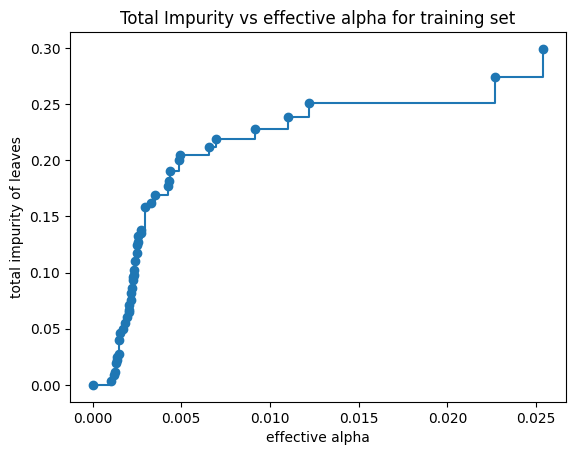

In [58]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

Next, we train a decision tree using the effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [59]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.20001206377244546


For the remainder of this example, we remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

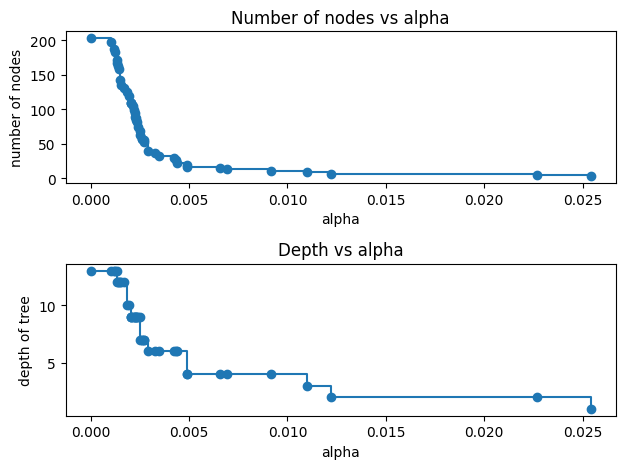

In [60]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Accuracy vs alpha for training and testing sets**

When ccp_alpha is set to zero and keeping the other default parameters of DecisionTreeClassifier, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting ccp_alpha=0.015 maximizes the testing accuracy.

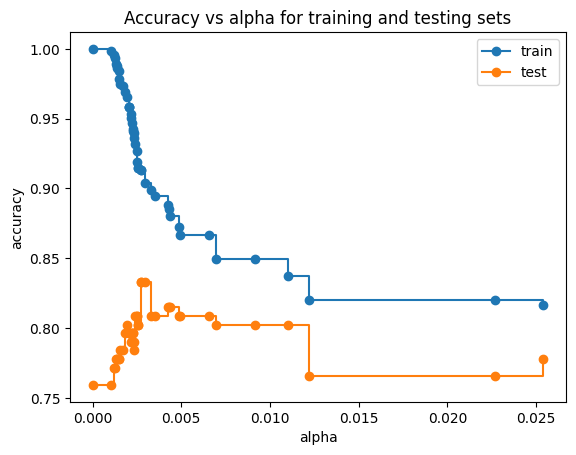

In [61]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()